In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['multiple disease pred.py', 'major_project_heatbeatIQ.ipynb']


In [ ]:
dataset = pd.read_csv('dataset/heart_disease_data.csv')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


_cp: Refers to chest pain type. It's categorized into four types: 0: Typical angina 1: Atypical angina 2: Non-anginal pain 3: Asymptomatic

_trestbps: Denotes the resting blood pressure (in mm Hg) of the patient upon admission to the hospital.

_chol: Stands for serum cholesterol level (in mg/dl).

_fbs: Represents the fasting blood sugar level (> 120 mg/dl is considered as 1 and <= 120 mg/dl is considered as 0).

_restecg: Refers to resting electrocardiographic results. It categorizes into three types: 0: Normal 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

_thalach: Represents the maximum heart rate achieved.

_exang: Indicates exercise-induced angina (1 = yes, 0 = no).

_oldpeak: Refers to the ST depression induced by exercise relative to rest.

_slope: Denotes the slope of the peak exercise ST segment. It's categorized into three types: 0: Upsloping 1: Flat 2: Downsloping

_ca: Represents the number of major vessels (0-3) colored by fluoroscopy.

_thal: Refers to a blood disorder called thalassemia. It's categorized into three types: 1: Normal 2: Fixed defect 3: Reversible defect

In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
361,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
278,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
711,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
dataset["target"].describe()


count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([0, 1])

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape



(820, 13)

In [ ]:
X_test.shape


(205, 13)

In [ ]:
Y_train.shape

(820,)

In [ ]:
Y_test.shape


(205,)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(205,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(205,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")


The accuracy score achieved using Linear SVM is: 83.9 %


1    526
0    499
Name: target, dtype: int64


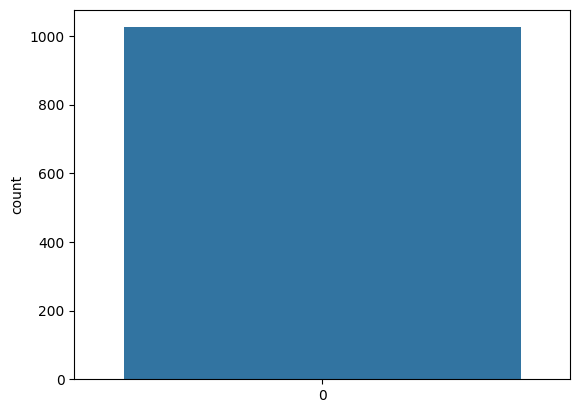

In [ ]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(205,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:

Y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(205,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(205,)

In [ ]:

score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

(205,)


In [ ]:

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

In [ ]:


print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

In [ ]:


print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 2ms/step - loss: 11.2792 - accuracy: 0.5268
Epoch 2/300
26/26 [==============================] - 0s 2ms/step - loss: 3.9026 - accuracy: 0.6159
Epoch 3/300
26/26 [==============================] - 0s 2ms/step - loss: 3.4696 - accuracy: 0.6244
Epoch 4/300
26/26 [==============================] - 0s 2ms/step - loss: 3.2796 - accuracy: 0.6354
Epoch 5/300
26/26 [==============================] - 0s 2ms/step - loss: 3.1025 - accuracy: 0.6220
Epoch 6/300
26/26 [==============================] - 0s 2ms/step - loss: 2.9071 - accuracy: 0.6329
Epoch 7/300
26/26 [==============================] - 0s 2ms/step - loss: 2.7171 - accuracy: 0.6366
Epoch 8/300
26/26 [==============================] - 0s 2ms/step - loss: 2.5418 - accuracy: 0.6415
Epoch 9/300
26/26 [==============================] - 0s 2ms/step - loss: 2.3295 - accuracy: 0.6280
Epoch 10/300
26/26 [==============================] - 0s 2ms/step - loss: 2.1598 - accuracy: 0.6451
Epoch 11

In [ ]:
Y_pred_nn = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
Y_pred_nn.shape

(205, 1)

In [ ]:
#Y_pred_nn = model.predict(X_test)
#Y_pred_nn.shape  # Output (205, 1)



score_nn = round(accuracy_score(Y_pred_nn, Y_test) * 100, 2)

print("The accuracy score achieved using Neural Network is: " + str(score_nn) + " %")


The accuracy score achieved using Neural Network is: 86.34 %


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 78.69 %
The accuracy score achieved using Neural Network is: 86.34 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

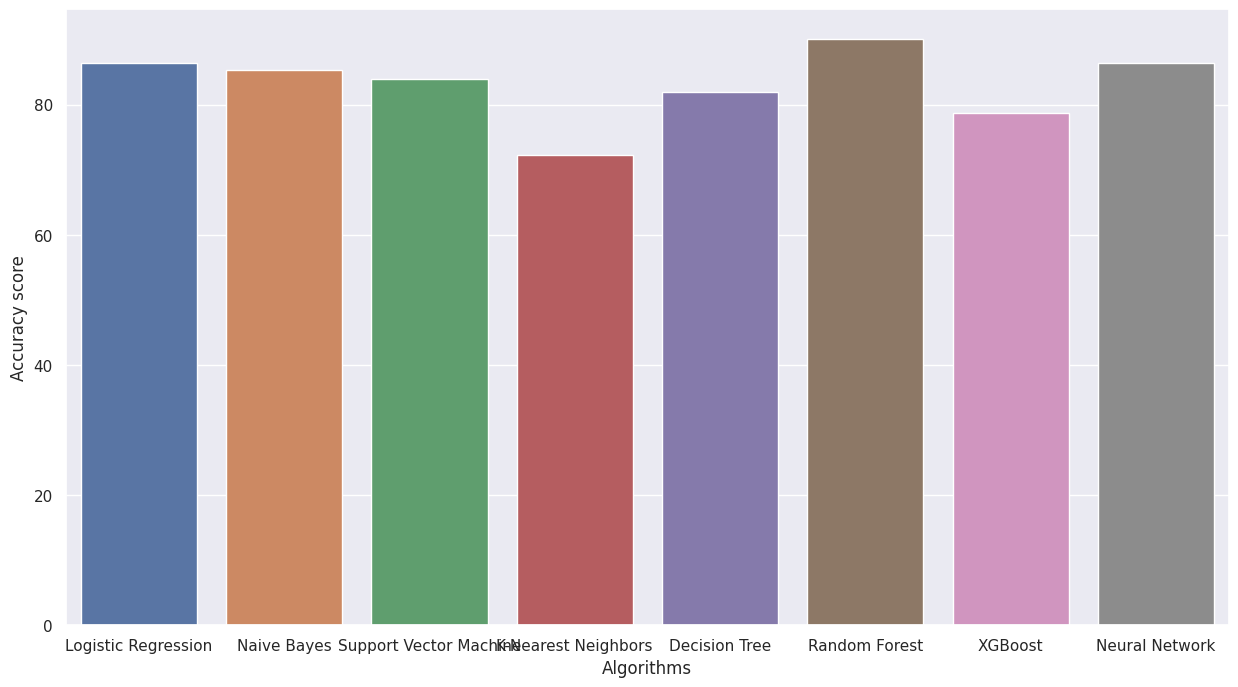

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [ ]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

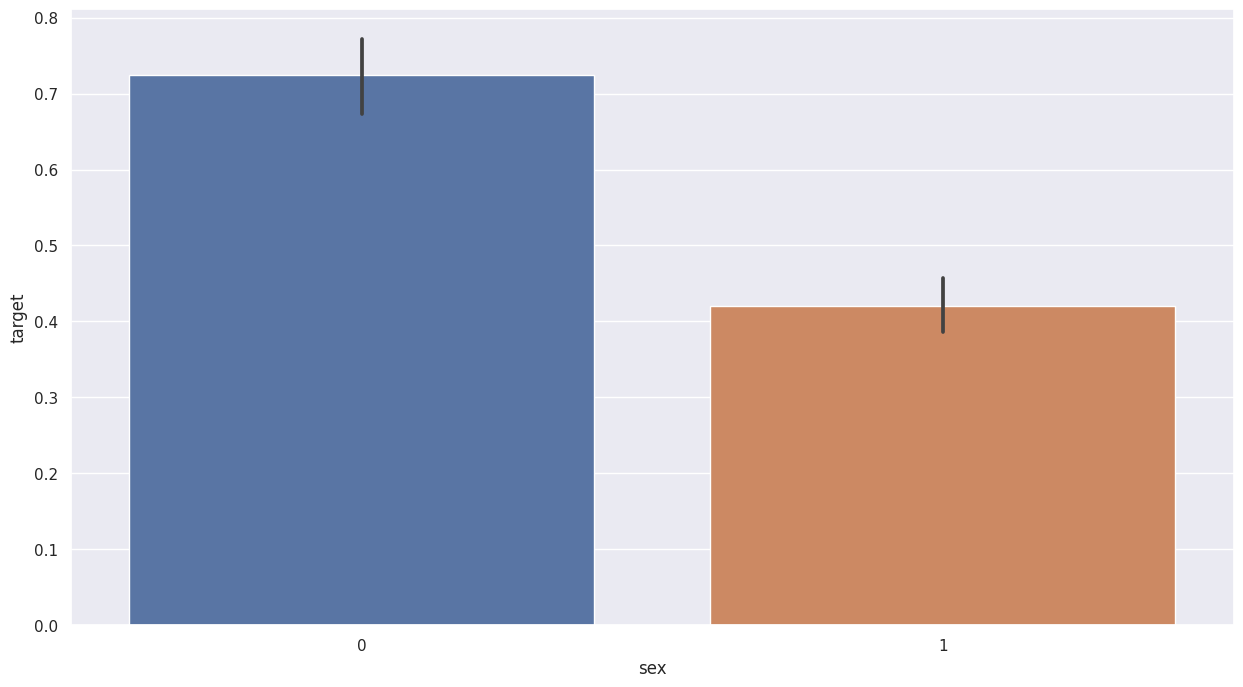

In [ ]:
sns.barplot(x=dataset["sex"],y=y)

In [ ]:

dataset["cp"].unique()

array([0, 1, 2, 3])

<Axes: xlabel='cp', ylabel='target'>

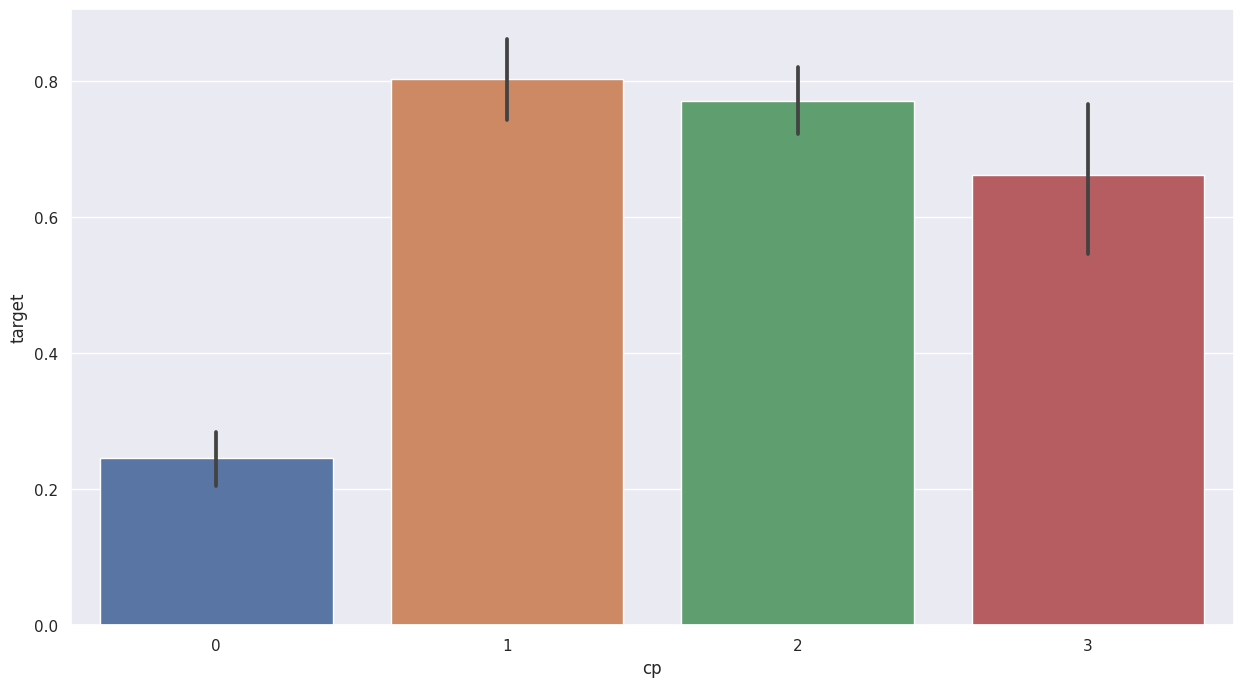

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

In [ ]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([0, 1])

<Axes: xlabel='fbs', ylabel='target'>

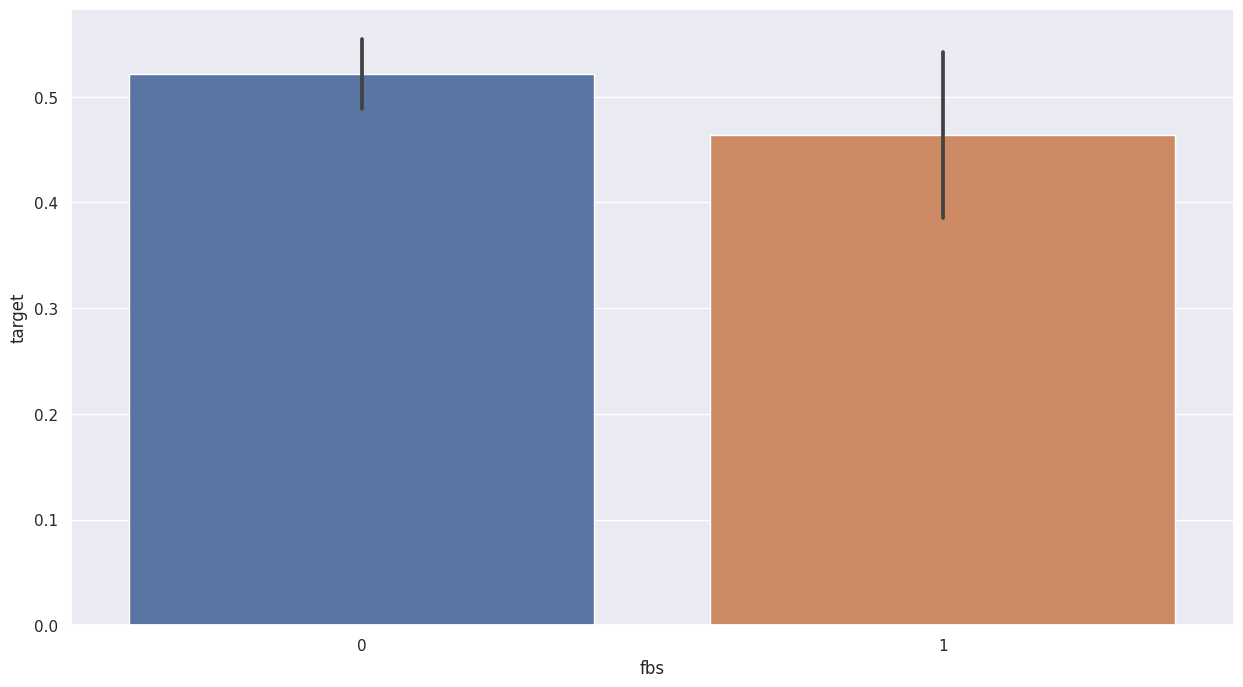

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

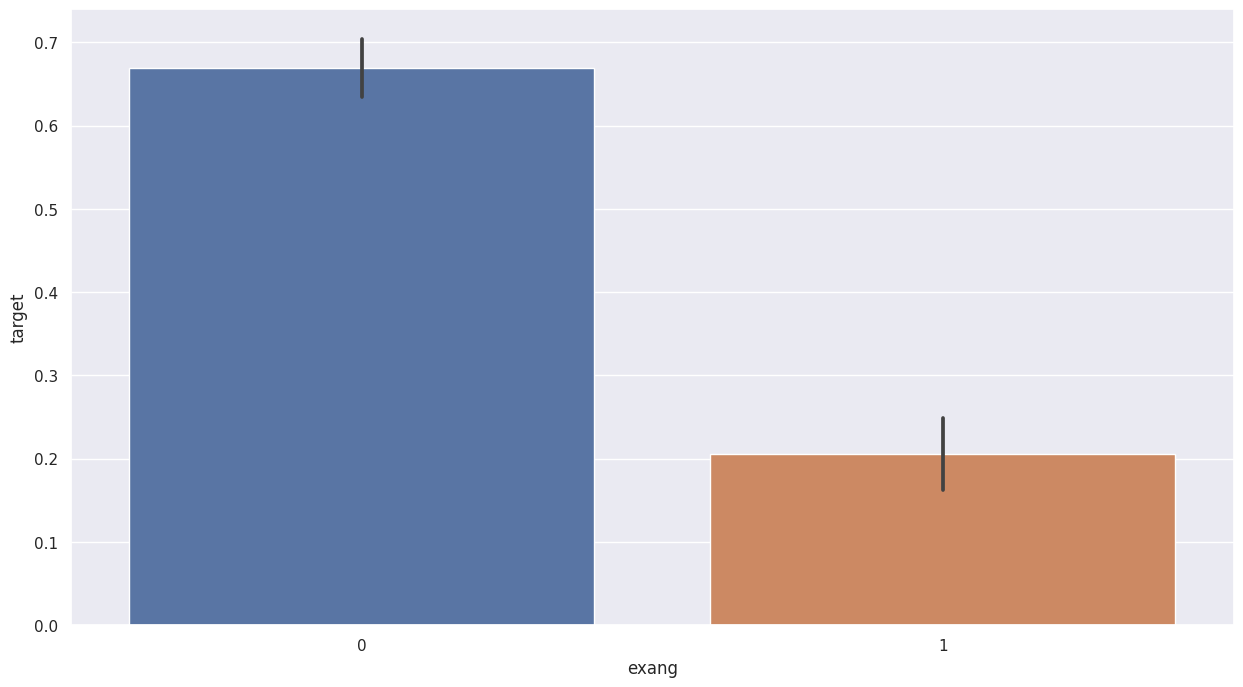

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

In [ ]:
dataset["slope"].unique()

array([2, 0, 1])

<Axes: xlabel='slope', ylabel='target'>

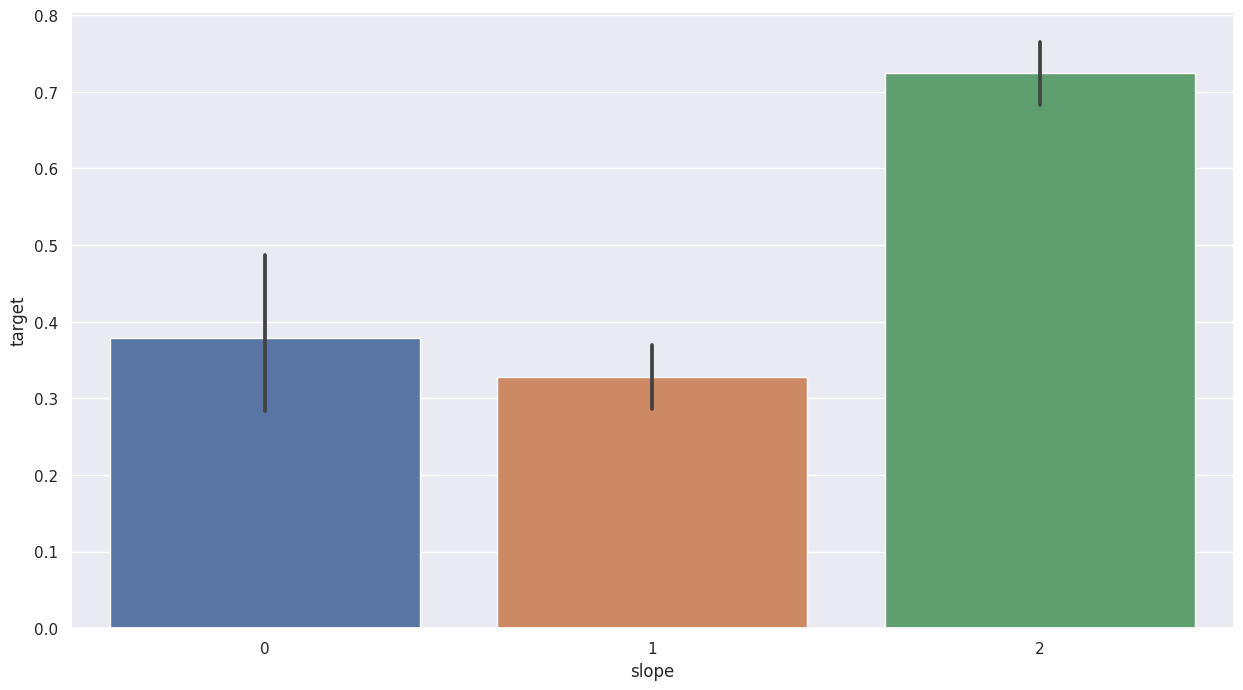

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

In [ ]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

<Axes: ylabel='count'>

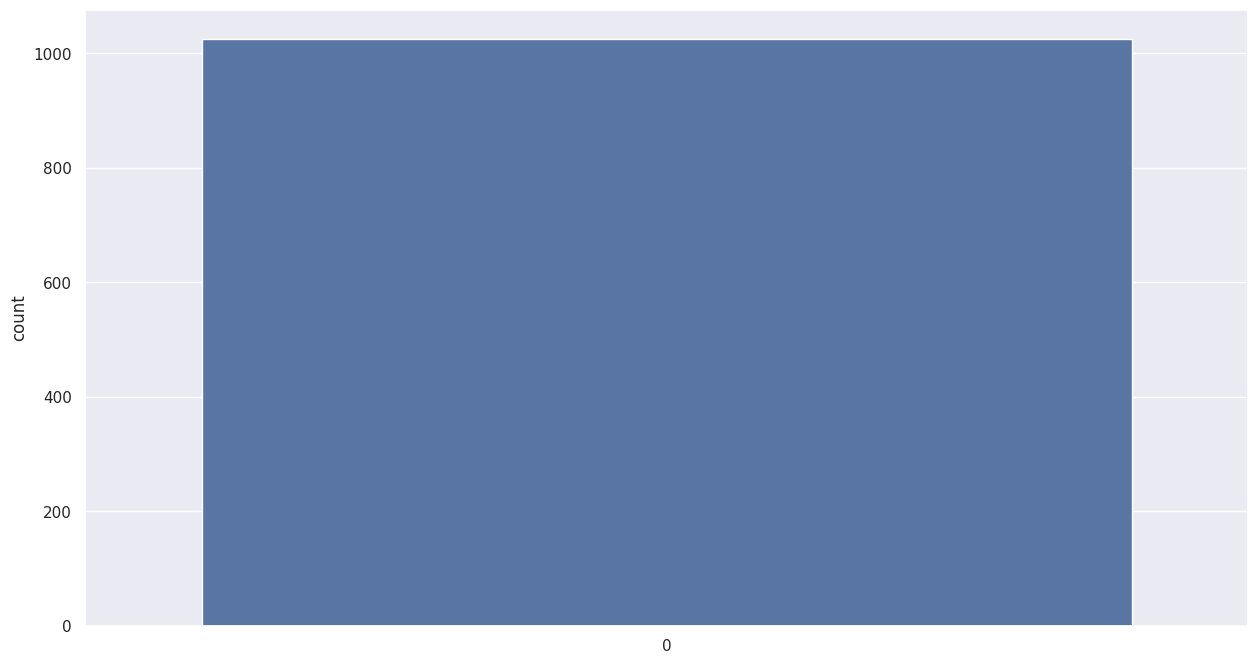

In [ ]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

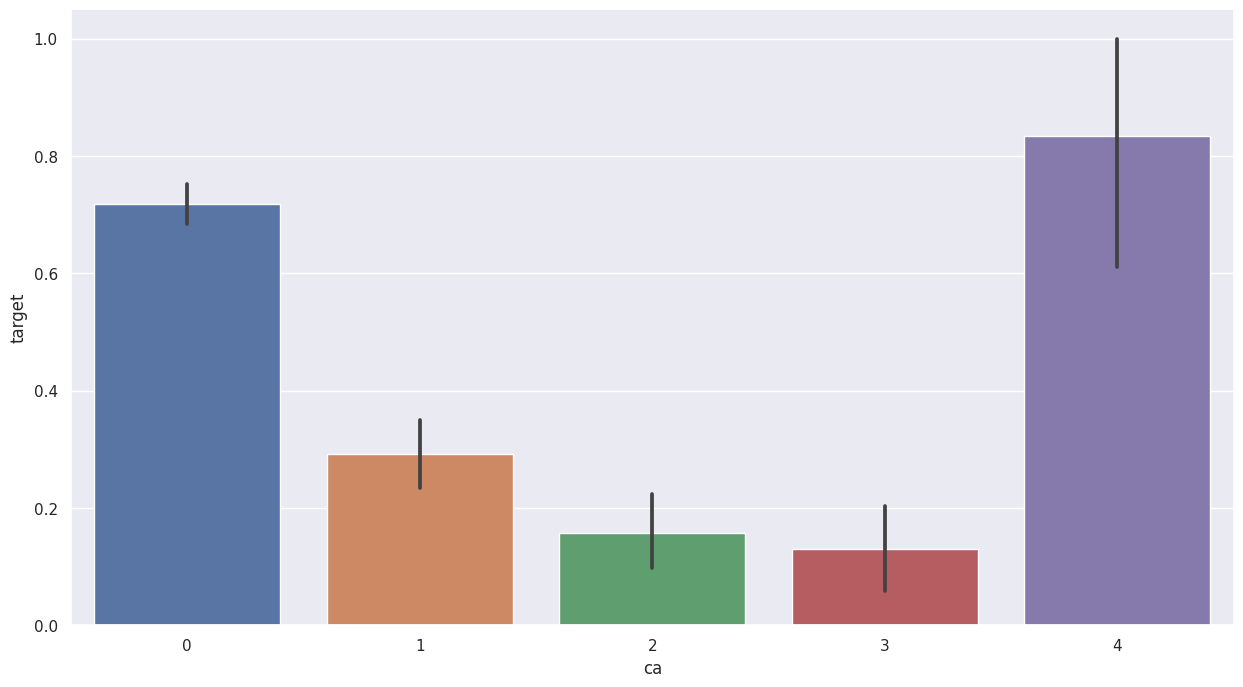

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

In [ ]:
dataset["thal"].unique()

array([3, 2, 1, 0])

<Axes: xlabel='thal', ylabel='target'>

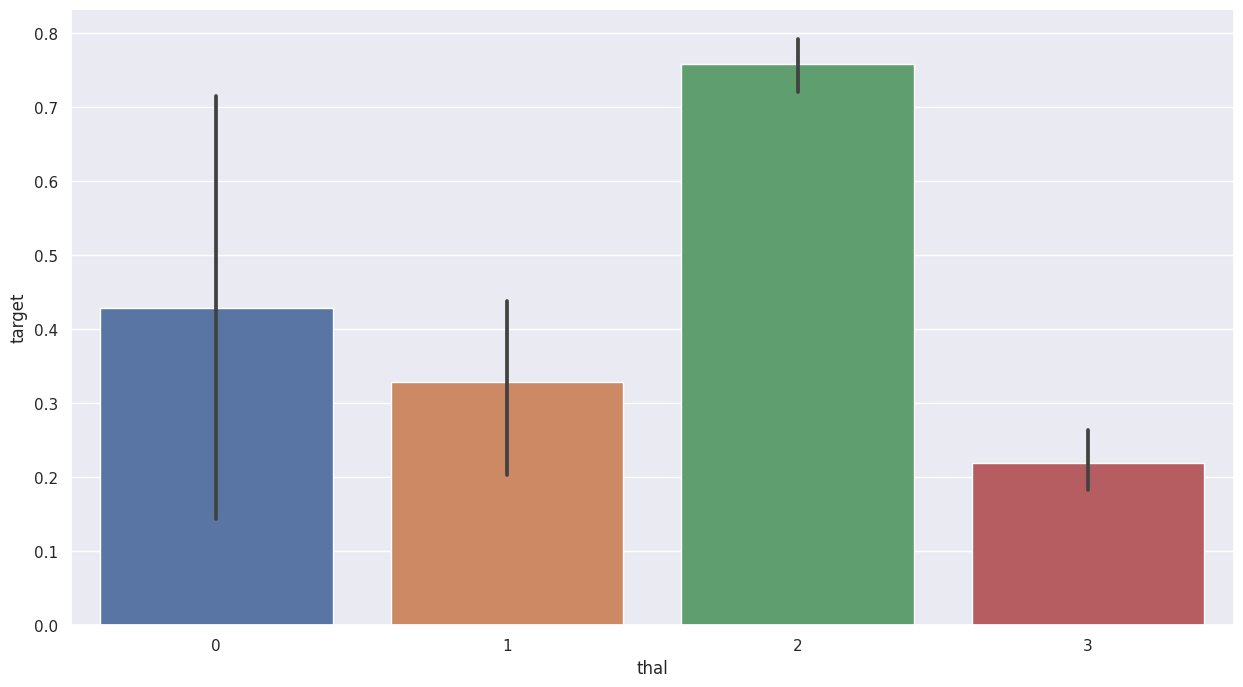

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

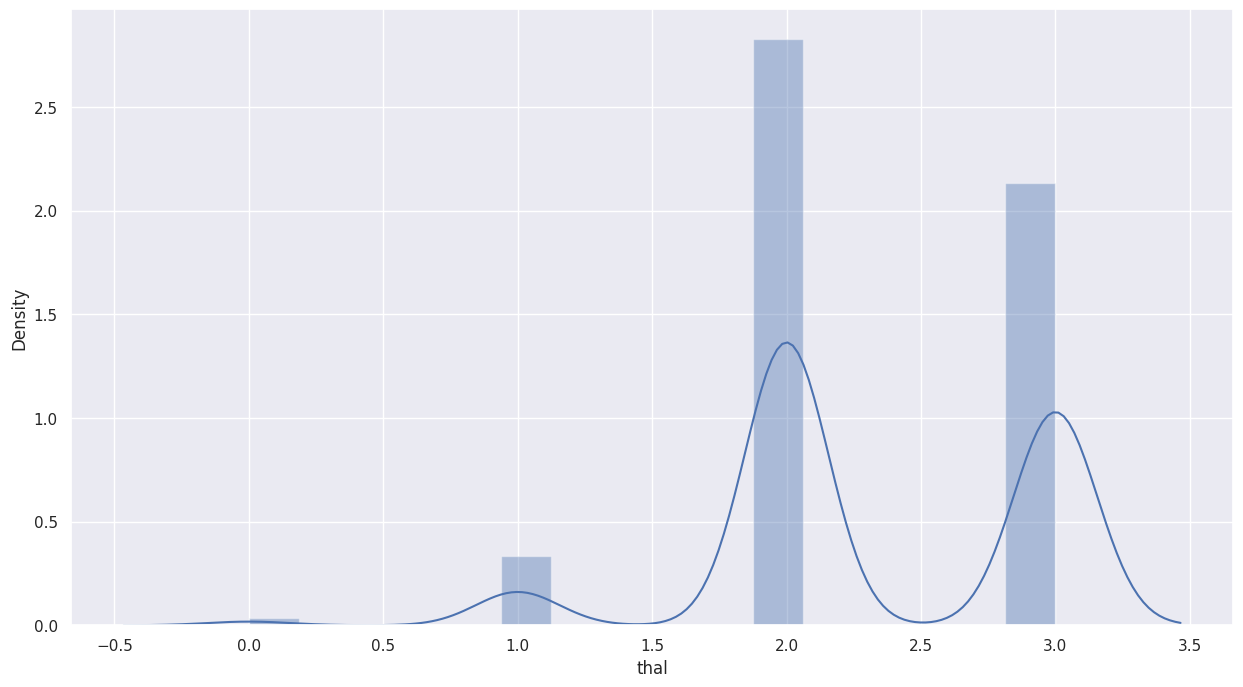

In [ ]:
sns.distplot(dataset["thal"])

Outputs:

The minimum age to have a heart disease start from 28 years old.  
Most of the people get heart disease at the age of 53 to 54 years.    
Most of the males and females get are with heart disease at the age of 54 to 55 years.  
Male percentage in the data: 78.91% 
Female percentage in the data : 21.09%  
Males are 274.23% more than female in the data. 
We have the highest number of people from Clveland(304) and lowest from Switzerland (123).  

***..Age vs Sex and origin..*** 

The highest number of female in this dataset are from Cleveland(97) and lowest are from VA Long Beach(6).   
The highest number of male are from Hungary(212) and lowest from Switzerland(113).  
***..Chest pain according to Origins..***   

The high number of Typical angina, Asymptomatic and Non anginal chest pain is in the Cleveland while Atypical anigna is highly occured in Hungary.  
Lowest number of chest pain (Typical angina, Asymptomatic, Non anginal and Atypical angina)is happened in Switzerland as compare to other origins.  

***..Chest pain according to Age..***   

The highest number of chest pain is happened is Asymtomatic Angina and the lowest number of cp is that happened is Typical Angina.  
The age in which highest number of Typical Angina happened is 62 to 63 years.   
The age in which highest number of Asymtomatic Angina happened is 56 to 57 years.   
The age in which highest number of Non Anginal happened is 54 to 55 years.  
The age in which highest number of Atypical Angina happened is 54 to 55 years.  